In [1]:
import numpy as np
from random import  random
from typing import List
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

### One-dimensional methods

In [2]:
plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['lines.markersize'] = 0.5
def visualize(x: List[int], fx: List[float], title: str = ""):
    plt.plot(x, fx, color='blue', label="f(x)")
    plt.plot(x[fx.index(min(fx))],min(fx), marker='o', markersize=5, color='red', label="Minimum")
    plt.xlabel("x", fontsize=15)
    plt.ylabel("f(x)", fontsize=15)
    plt.title(title, fontsize=15)
    plt.legend(fontsize=15)
    plt.show()

In [3]:
eps = 0.001

Functions

In [4]:
def f_cube(x):
    return x**3

In [5]:
def f_abs(x):
    return abs(x - 0.2)

In [6]:
def f_sin(x):
    return x * np.sin(1/x)

#### Algorithms

1) Exaustive search

In [7]:
def brute_force(a, b, eps, func):
    fx = []
    n = 1 / eps
    for k in tqdm(np.arange(a, b + eps, eps)):
        fx.append(func(k))
    return fx #return results of function cimputation

In [8]:
a = brute_force(0, 1, 0.001, f_cube)

100%|██████████| 1001/1001 [00:00<00:00, 501732.59it/s]


In [9]:
print(f'Count of iterations {len(a)}')

Count of iterations 1001


In [10]:
b = brute_force(0, 1, 0.001, f_abs)

100%|██████████| 1001/1001 [00:00<00:00, 32000.02it/s]


In [11]:
print(f'Count of iterations {len(b)}')

Count of iterations 1001


In [12]:
c = brute_force(0.01, 1, 0.001, f_sin)

100%|██████████| 991/991 [00:00<00:00, 247827.05it/s]


In [13]:
print(f'Count of iterations {len(c)}')

Count of iterations 991


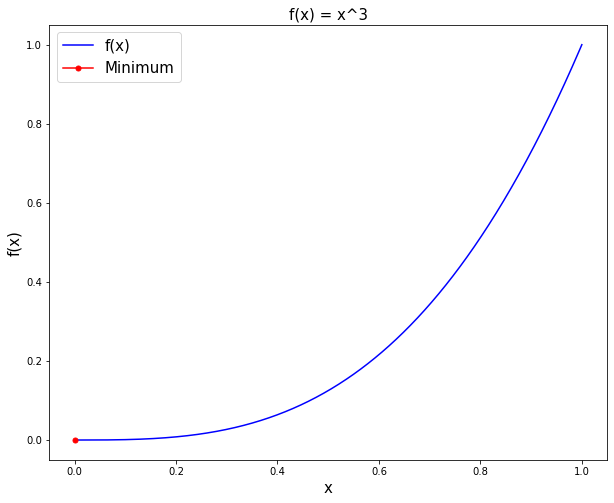

In [14]:
visualize(np.arange(0, 1 + eps, eps), a, 'f(x) = x^3');

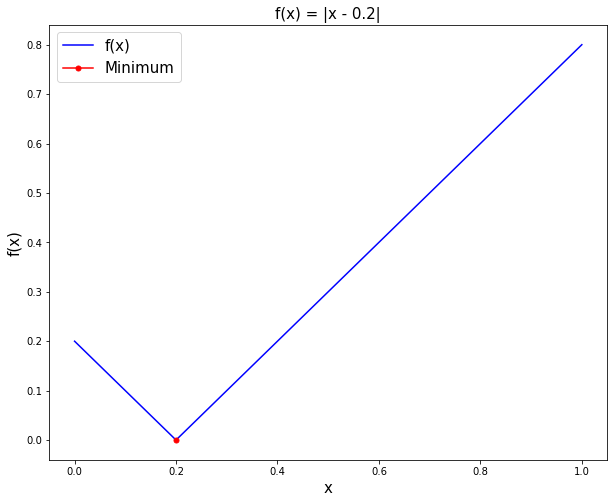

In [15]:
visualize(np.arange(0, 1 + eps, eps), b, 'f(x) = |x - 0.2|');

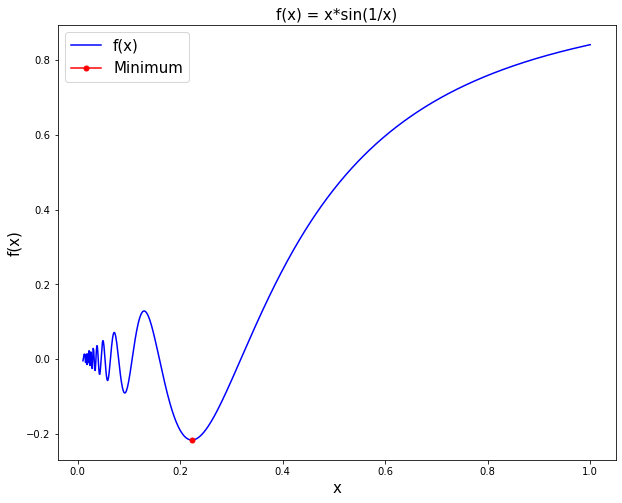

In [16]:
visualize(np.arange(0.01, 1 + eps, eps), c, 'f(x) = x*sin(1/x)');

2) Dichotomy

In [17]:
def dichotomy(a, b, eps, func):
    call = 0
    beta = eps - eps / 10
    rounds = 0 # number of iterations
    while abs(a - b) > eps:
        call += 1
        xmin = (a + b - beta) / 2
        xmax = (a + b + beta) / 2
        rounds += 2
        if func(xmin) <= func(xmax):
            b = xmax
        else:
            a = xmin
    return func((a + b) / 2), rounds + 1, call

In [18]:
a1 = dichotomy(0, 1, 0.001, f_cube)

In [19]:
a1

(1.1093111164523245e-10, 29, 14)

In [20]:
b1 = dichotomy(0, 1, 0.001, f_abs)

In [21]:
b1

(7.785034179669248e-06, 29, 14)

In [22]:
c1 = dichotomy(0.01, 1, 0.001, f_sin)

In [23]:
c1

(-0.2172336224666543, 29, 14)

3) Golden section

In [24]:
def golden_section(f, a, b, eps):
    
    x1 = a + (3 - np.sqrt(5)) * (b - a) / 2
    x2 = b + (np.sqrt(5) - 3) * (b - a) / 2
    call = 0
    rounds = 1
    while abs(b - a) > eps:
        call += 1
        if f(x1) <= f(x2):
            b = x2
        else:
            a = x1

        x1 = a + (3 - np.sqrt(5)) * (b - a) / 2
        x2 = b + (np.sqrt(5) - 3) * (b - a) / 2
        rounds += 1

    return f((b + a) / 2), rounds, call

In [25]:
a2 = golden_section(f_cube, 0, 1, 0.001)
a2

(4.9256800857728645e-11, 16, 15)

In [26]:
b2 = golden_section(f_abs, 0, 1, 0.001)
b2

(7.331374358574005e-05, 16, 15)

In [27]:
c2 = golden_section(f_sin, 0.01, 1, 0.001)
c2

(-0.2172323281775325, 16, 15)

### Multidimensional methods

In [28]:
a = random()
b = random()

In [29]:
# Generates randim numbers
x = []
y = []
for k in range(100):
    x.append(k / 100)
    y.append(a * x[k] + b + random())

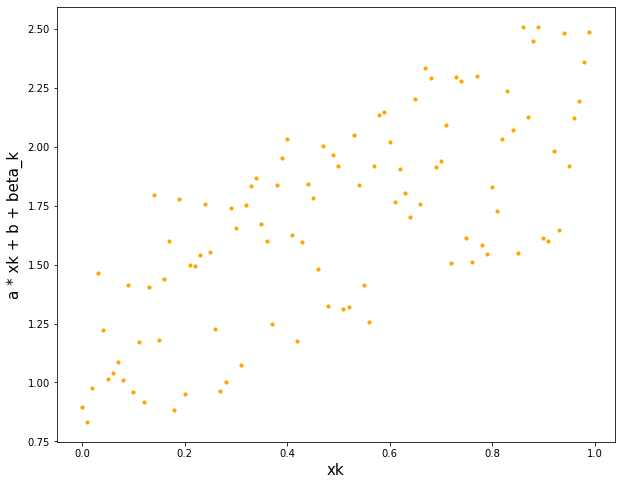

In [30]:
plt.scatter(x, y, marker='o', color='orange', s=10)
plt.xlabel("xk", fontsize=15)
plt.ylabel("a * xk + b + beta_k", fontsize=15);

Functions

In [31]:
def f_linear(x, a, b):
    return a * x + b

In [32]:
def f_rational(x, a, b):
    return a / (1 + b * x)

In [33]:
def least_squares(x, a, b):
    func = f_linear
    return np.sum((func(x, a, b) - y)**2) / x.shape[0]

In [51]:
def least_squares(variables, approximant, x, y):
    return sum([(approximant(x_k, *variables) - y_k) ** 2 for x_k, y_k in zip(x, y)])

In [56]:
res_1 = scipy.optimize.minimize(
least_squares,
(1,1),
args=(
f_linear,
x,
y,
),
method='Nelder-Mead',
tol=0.001
)

In [57]:
res_1

 final_simplex: (array([[1.08329004, 1.14616057],
       [1.08304082, 1.14603454],
       [1.08427348, 1.14543338]]), array([8.92272741, 8.92272761, 8.92273092]))
           fun: 8.922727413688927
       message: 'Optimization terminated successfully.'
          nfev: 42
           nit: 21
        status: 0
       success: True
             x: array([1.08329004, 1.14616057])

In [58]:
res_2 = scipy.optimize.minimize(
least_squares,
(1,1),
args=(
f_linear,
x,
y,
),
method='Powell',
tol=0.001
)

In [59]:
res_2

   direc: array([[ 0.        ,  1.        ],
       [-0.16415043,  0.08125446]])
     fun: 8.922724910729528
 message: 'Optimization terminated successfully.'
    nfev: 77
     nit: 3
  status: 0
 success: True
       x: array([1.08348768, 1.14591518])

In [95]:
res_3 = scipy.optimize.brute(
least_squares,
ranges = (slice(0, 1, 0.01), slice(0, 1, 0.01)),
args=(
f_linear,
x,
y,
),

)

In [67]:
res_3

array([1.0835076 , 1.14589407])

In [76]:
res_3[0], res_3[1]

(1.0835075983776732, 1.1458940736878276)

In [78]:
x = np.arange(0, 1, 0.01)

Linear approximation

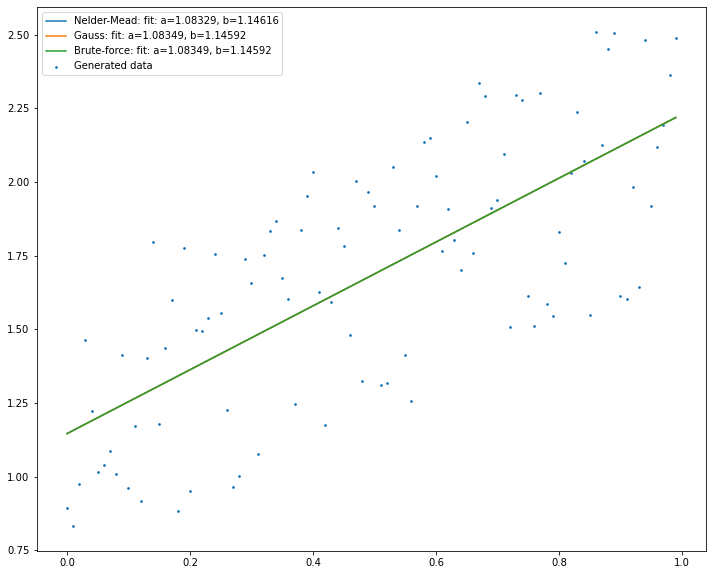

In [96]:
plt.figure(figsize=(12,10))
plt.scatter(x, y, s=3, label='Generated data') 
plt.plot(x, f_linear(x, res_1.x[0], res_1.x[1]), '-', label='Nelder-Mead: fit: a=%5.5f, b=%5.5f' % (res_1.x[0], res_1.x[1]))
plt.plot(x, f_linear(x, res_2.x[0], res_2.x[1]), '-', label='Gauss: fit: a=%5.5f, b=%5.5f' % (res_2.x[0], res_2.x[1]))
plt.plot(x, f_linear(x, res_3[0], res_3[1]), '-', label='Brute-force: fit: a=%5.5f, b=%5.5f' % (res_3[0], res_3[1]))
plt.legend()
plt.show()

Rational approximation

In [85]:
res_4 = scipy.optimize.minimize(
least_squares,
(1,1),
args=(
f_rational,
x,
y,
),
method='Nelder-Mead',
tol=0.001
)

In [101]:
res_4

 final_simplex: (array([[ 1.27443719, -0.4476266 ],
       [ 1.27367942, -0.44807942],
       [ 1.27440284, -0.4472444 ]]), array([9.58025238, 9.58025275, 9.58028713]))
           fun: 9.580252376000304
       message: 'Optimization terminated successfully.'
          nfev: 87
           nit: 46
        status: 0
       success: True
             x: array([ 1.27443719, -0.4476266 ])

In [86]:
res_5 = scipy.optimize.minimize(
least_squares,
(1,1),
args=(
f_rational,
x,
y,
),
method='Powell',
tol=0.001
)

In [102]:
res_5

   direc: array([[-0.42745635, -0.43699338],
       [-0.0423898 , -0.0078126 ]])
     fun: 9.58024491392341
 message: 'Optimization terminated successfully.'
    nfev: 124
     nit: 5
  status: 0
 success: True
       x: array([ 1.27406342, -0.44780947])

In [99]:
res_6 = scipy.optimize.brute(
least_squares,
ranges = (slice(0.01, 1, 0.01), slice(0.01, 1, 0.01)),
args=(
f_rational,
x,
y,
),

)

In [103]:
res_6

array([ 1.27405668, -0.44779459])

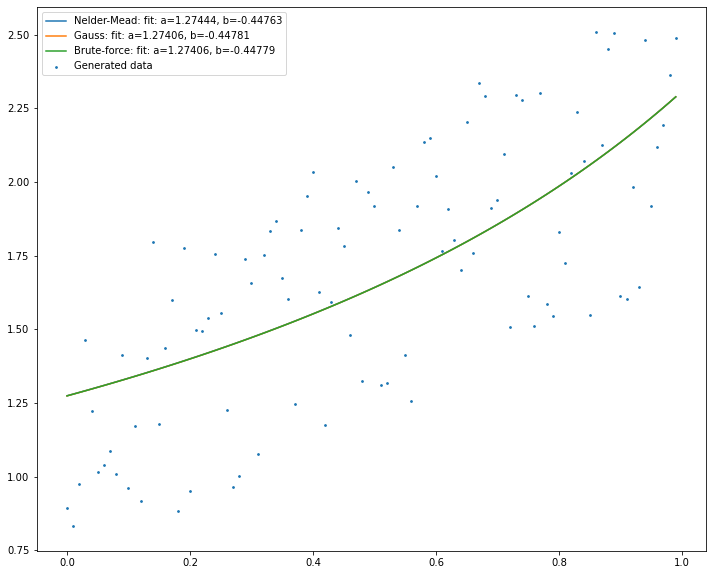

In [100]:
plt.figure(figsize=(12,10))
plt.scatter(x, y, s=3, label='Generated data') 
plt.plot(x, f_rational(x, res_4.x[0], res_4.x[1]), '-', label='Nelder-Mead: fit: a=%5.5f, b=%5.5f' % (res_4.x[0], res_4.x[1]))
plt.plot(x, f_rational(x, res_5.x[0], res_5.x[1]), '-', label='Gauss: fit: a=%5.5f, b=%5.5f' % (res_5.x[0], res_5.x[1]))
plt.plot(x, f_rational(x, res_6[0], res_6[1]), '-', label='Brute-force: fit: a=%5.5f, b=%5.5f' % (res_6[0], res_6[1]))
plt.legend()
plt.show()